In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from math import sqrt
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [108]:
data = pd.read_csv('Mod_Data_csv_edit_category.csv')
data.head()

,episode_number,pitch_number,brand_name,idea,Category,Male_rating,Female_rating,deal,pitcher_ask_amount,ask_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,4,2.93750,2.93750,1,50.0,5.0,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,2,3.71875,3.43750,1,40.0,15.0,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,8,3.03125,2.93750,1,25.0,10.0,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,4,3.40625,3.31250,1,70.0,1.0,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,3,3.65625,3.34375,0,50.0,5.0,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   pitch_number           117 non-null    int64  
 2   brand_name             117 non-null    object 
 3   idea                   117 non-null    object 
 4   Category               117 non-null    int64  
 5   Male_rating            114 non-null    float64
 6   Female_rating          114 non-null    float64
 7   deal                   117 non-null    int64  
 8   pitcher_ask_amount     117 non-null    float64
 9   ask_equity             117 non-null    float64
 10  ask_valuation          117 non-null    float64
 11  deal_amount            117 non-null    float64
 12  deal_equity            117 non-null    float64
 13  deal_valuation         117 non-null    float64
 14  ashneer_present        117 non-null    int64  
 15  anupam

In [110]:
data.describe()

,episode_number,pitch_number,Category,Male_rating,Female_rating,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
count,117.000000,117.000000,117.000000,114.000000,114.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,18.735043,59.000000,5.051282,3.435015,3.387804,0.555556,319.854709,5.188034,3852.462479,31.982915,...,0.179487,0.205128,0.239316,0.188034,0.128205,0.230769,0.059829,1.230769,18.132481,5.583590
std,10.070778,33.919021,2.635455,0.504219,0.438829,0.499041,2767.842777,3.892121,11931.601957,36.687391,...,0.385410,0.405532,0.428501,0.392420,0.335756,0.423137,0.238190,1.410457,23.588682,10.803799
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.001010,0.250000,0.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,30.000000,4.000000,3.195312,3.250000,0.000000,45.000000,2.500000,666.670000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,59.000000,4.000000,3.562500,3.468750,1.000000,50.000000,5.000000,1250.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.250000
75%,27.000000,88.000000,8.000000,3.750000,3.625000,1.000000,80.000000,7.500000,2857.140000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,25.000000,6.000000
max,35.000000,117.000000,10.000000,4.343750,4.062500,1.000000,30000.000000,25.000000,120000.000000,150.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,100.000000,75.000000


In [111]:
data.isnull().sum()

episode_number           0
pitch_number             0
brand_name               0
idea                     0
Category                 0
Male_rating              3
Female_rating            3
deal                     0
pitcher_ask_amount       0
ask_equity               0
ask_valuation            0
deal_amount              0
deal_equity              0
deal_valuation           0
ashneer_present          0
anupam_present           0
aman_present             0
namita_present           0
vineeta_present          0
peyush_present           0
ghazal_present           0
ashneer_deal             0
anupam_deal              0
aman_deal                0
namita_deal              0
vineeta_deal             0
peyush_deal              0
ghazal_deal              0
total_sharks_invested    0
amount_per_shark         0
equity_per_shark         0
dtype: int64

In [112]:
print(data.Male_rating.mean())
print(data.Male_rating.median())
print(data.Male_rating.mode())

3.4350152093947366
3.5625
0    3.59375
Name: Male_rating, dtype: float64


In [113]:
print(data.Female_rating.mean())
print(data.Female_rating.median())
print(data.Female_rating.mode())

3.3878041878947367
3.46875
0    3.5
Name: Female_rating, dtype: float64


In [114]:
data['Male_rating'] = data['Male_rating'].fillna(data['Male_rating'].mean())
data['Female_rating'] = data['Female_rating'].fillna(data['Female_rating'].mean())
data

,episode_number,pitch_number,brand_name,idea,Category,Male_rating,Female_rating,deal,pitcher_ask_amount,ask_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,4,2.93750,2.937500,1,50.0,5.0,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,2,3.71875,3.437500,1,40.0,15.0,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,8,3.03125,2.937500,1,25.0,10.0,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,4,3.40625,3.312500,1,70.0,1.0,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,3,3.65625,3.343750,0,50.0,5.0,...,0,0,0,0,0,0,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,34,113,Green Protein,Plant-Based Protein,4,3.78125,3.468750,0,60.0,2.0,...,0,0,0,0,0,0,0,0,0.0,0.000000
113,34,114,On2Cook,Fastest Cooking Device,4,3.40625,3.093750,0,100.0,1.0,...,0,0,0,0,0,0,0,0,0.0,0.000000
114,35,115,Jain Shikanji,Lemonade,4,3.00000,3.593750,1,40.0,8.0,...,1,1,1,0,1,0,0,4,10.0,7.500000
115,35,116,Woloo,Washroom Finder,7,3.90625,3.677419,0,50.0,4.0,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [115]:
data = data.drop(['idea','brand_name','episode_number','pitch_number'], axis=1)
data.head()

,Category,Male_rating,Female_rating,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,4,2.93750,2.93750,1,50.0,5.0,1000.00,75.0,16.00,468.75,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,2,3.71875,3.43750,1,40.0,15.0,266.67,40.0,50.00,80.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,8,3.03125,2.93750,1,25.0,10.0,250.00,25.0,30.00,83.33,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,4,3.40625,3.31250,1,70.0,1.0,7000.00,70.0,2.75,2545.45,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,3,3.65625,3.34375,0,50.0,5.0,1000.00,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


<AxesSubplot:>

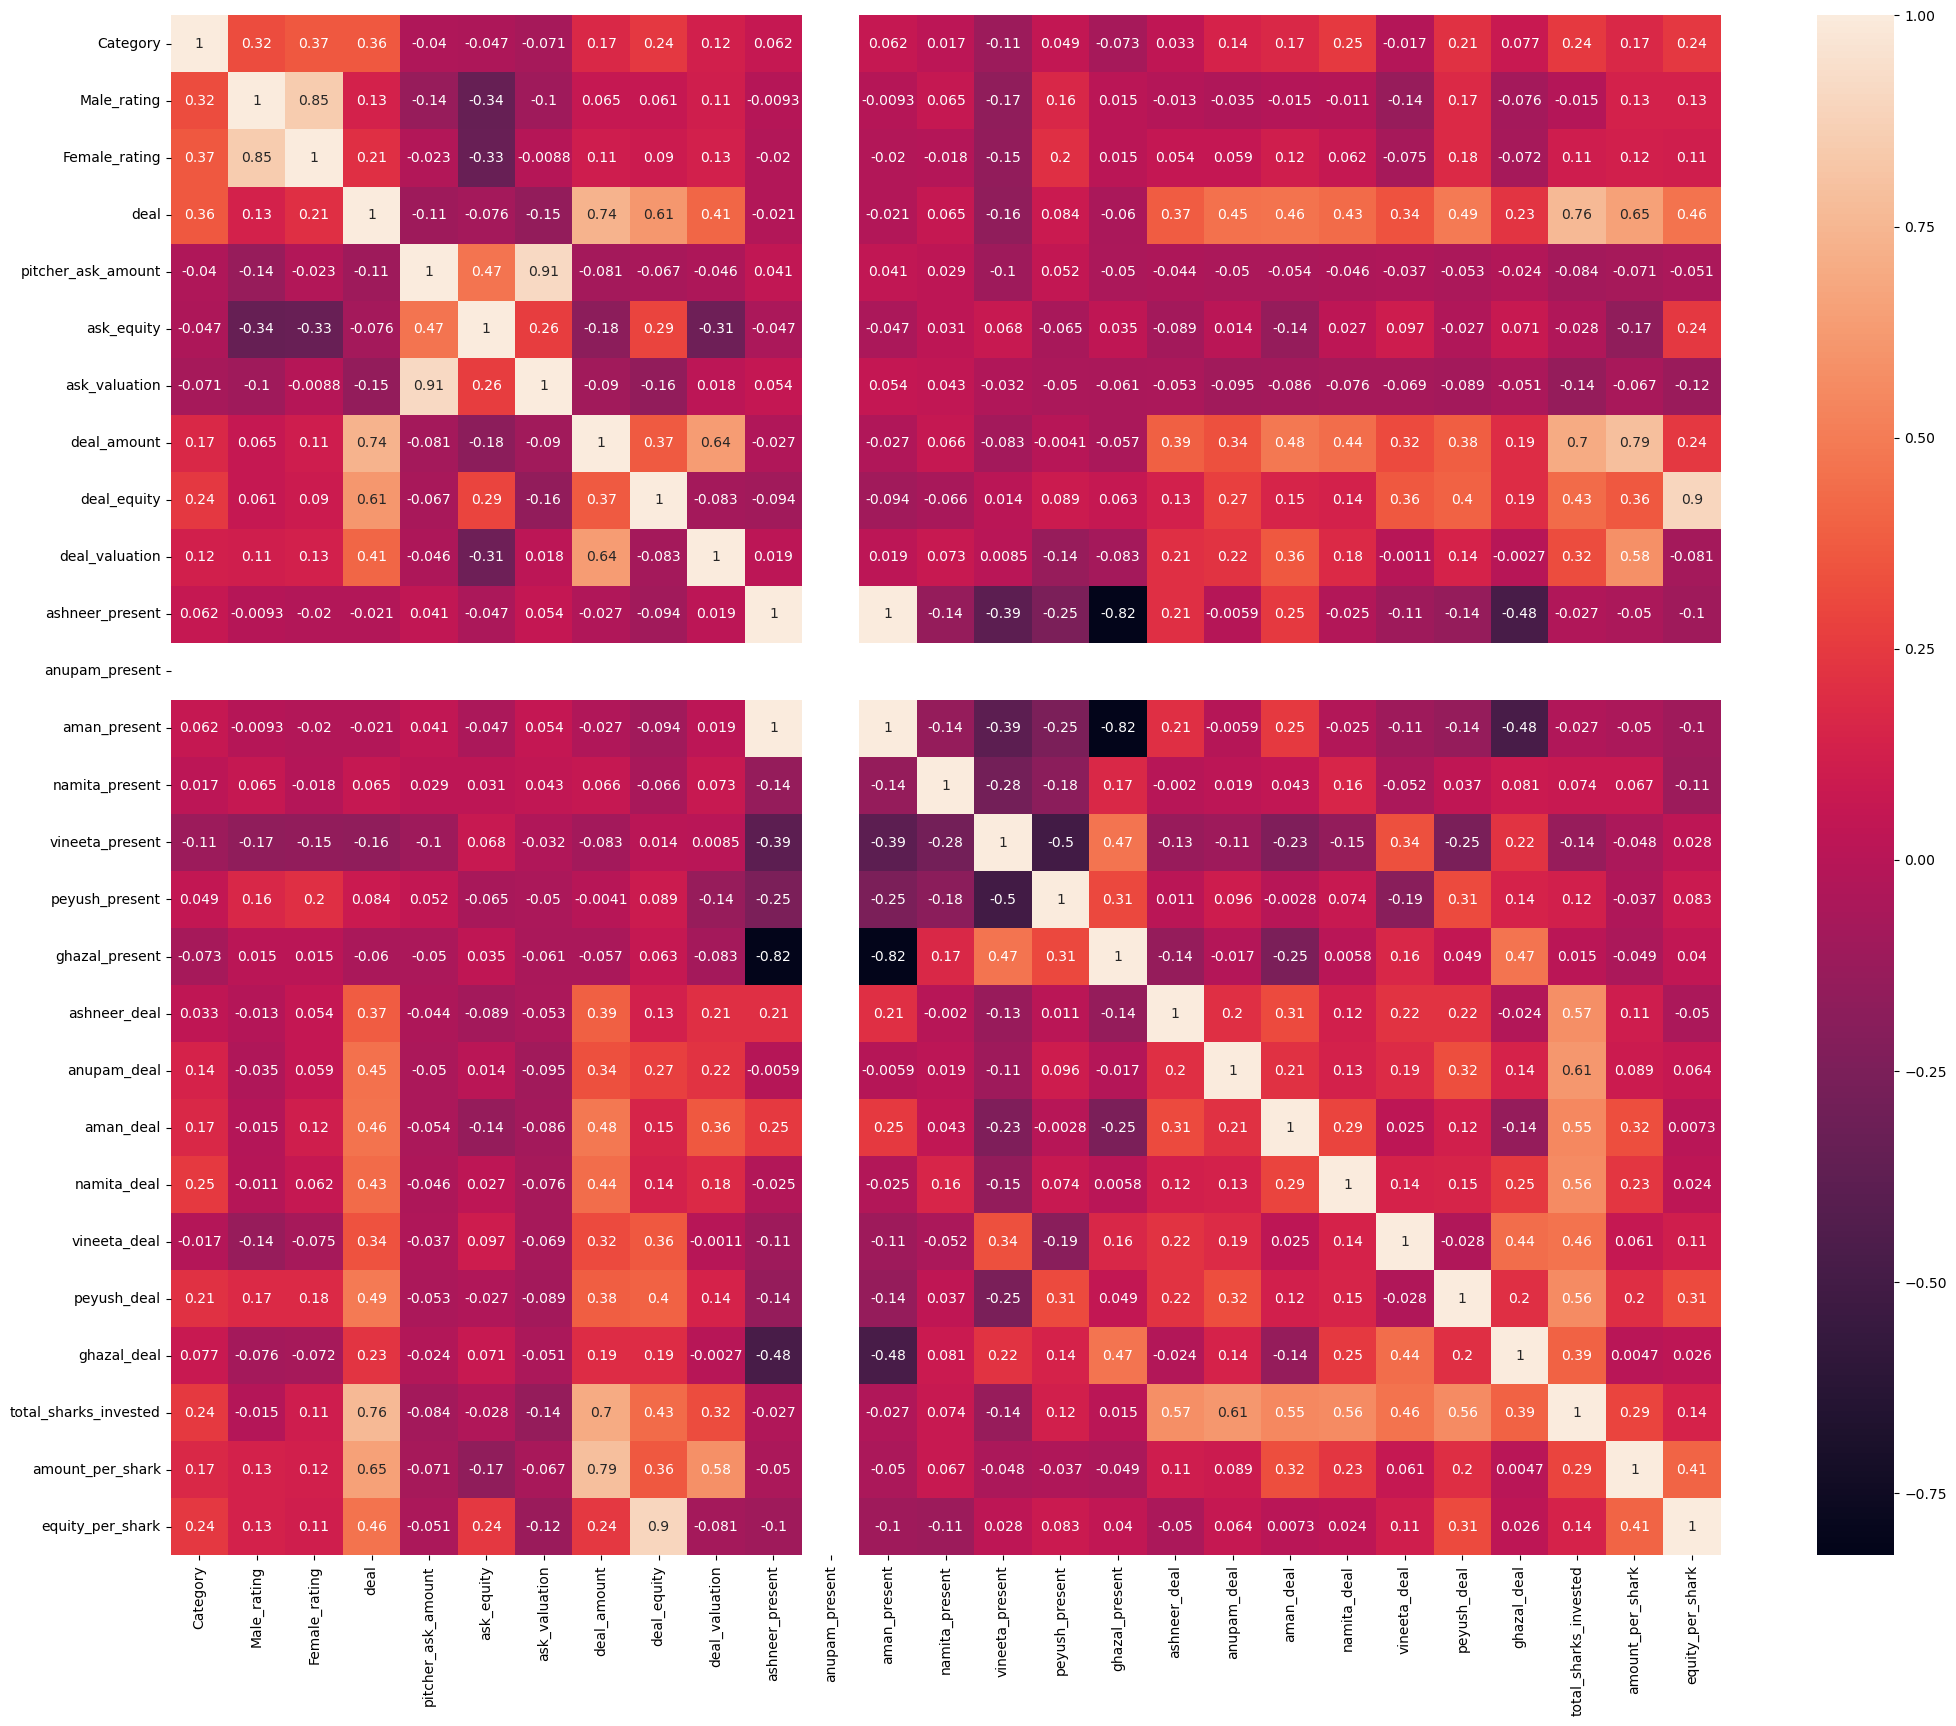

In [116]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(), annot = True)

In [117]:
print(data.skew())
print(data.kurt())

Category                  0.187838
Male_rating              -2.124735
Female_rating            -2.930791
deal                     -0.226521
pitcher_ask_amount       10.813586
ask_equity                1.945516
ask_valuation             8.425035
deal_amount               0.837652
deal_equity               2.109755
deal_valuation            3.639643
ashneer_present          -1.854647
anupam_present            0.000000
aman_present             -1.854647
namita_present           -2.818373
vineeta_present          -0.261914
peyush_present           -1.183139
ghazal_present            1.353724
ashneer_deal              1.692155
anupam_deal               1.479538
aman_deal                 1.237884
namita_deal               1.617610
vineeta_deal              2.253189
peyush_deal               1.294677
ghazal_deal               3.760243
total_sharks_invested     0.968345
amount_per_shark          1.458489
equity_per_shark          3.682885
dtype: float64
Category                  -1.005215
Male

In [118]:
#sns.pairplot(data)

In [119]:
data.isnull().sum()

Category                 0
Male_rating              0
Female_rating            0
deal                     0
pitcher_ask_amount       0
ask_equity               0
ask_valuation            0
deal_amount              0
deal_equity              0
deal_valuation           0
ashneer_present          0
anupam_present           0
aman_present             0
namita_present           0
vineeta_present          0
peyush_present           0
ghazal_present           0
ashneer_deal             0
anupam_deal              0
aman_deal                0
namita_deal              0
vineeta_deal             0
peyush_deal              0
ghazal_deal              0
total_sharks_invested    0
amount_per_shark         0
equity_per_shark         0
dtype: int64

In [120]:
X = data.drop(['amount_per_shark','deal','ashneer_present','anupam_present','aman_present','namita_present','vineeta_present','peyush_present','ghazal_present','total_sharks_invested'], axis=1)
y = data[['amount_per_shark']]
y = np.array(y)
y = y.astype(int)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X, y

(     Category  Male_rating  Female_rating  pitcher_ask_amount  ask_equity  \
 0           4      2.93750       2.937500                50.0         5.0   
 1           2      3.71875       3.437500                40.0        15.0   
 2           8      3.03125       2.937500                25.0        10.0   
 3           4      3.40625       3.312500                70.0         1.0   
 4           3      3.65625       3.343750                50.0         5.0   
 ..        ...          ...            ...                 ...         ...   
 112         4      3.78125       3.468750                60.0         2.0   
 113         4      3.40625       3.093750               100.0         1.0   
 114         4      3.00000       3.593750                40.0         8.0   
 115         7      3.90625       3.677419                50.0         4.0   
 116         2      4.09375       3.875000               100.0         2.5   
 
      ask_valuation  deal_amount  deal_equity  deal_valuation 

<AxesSubplot:>

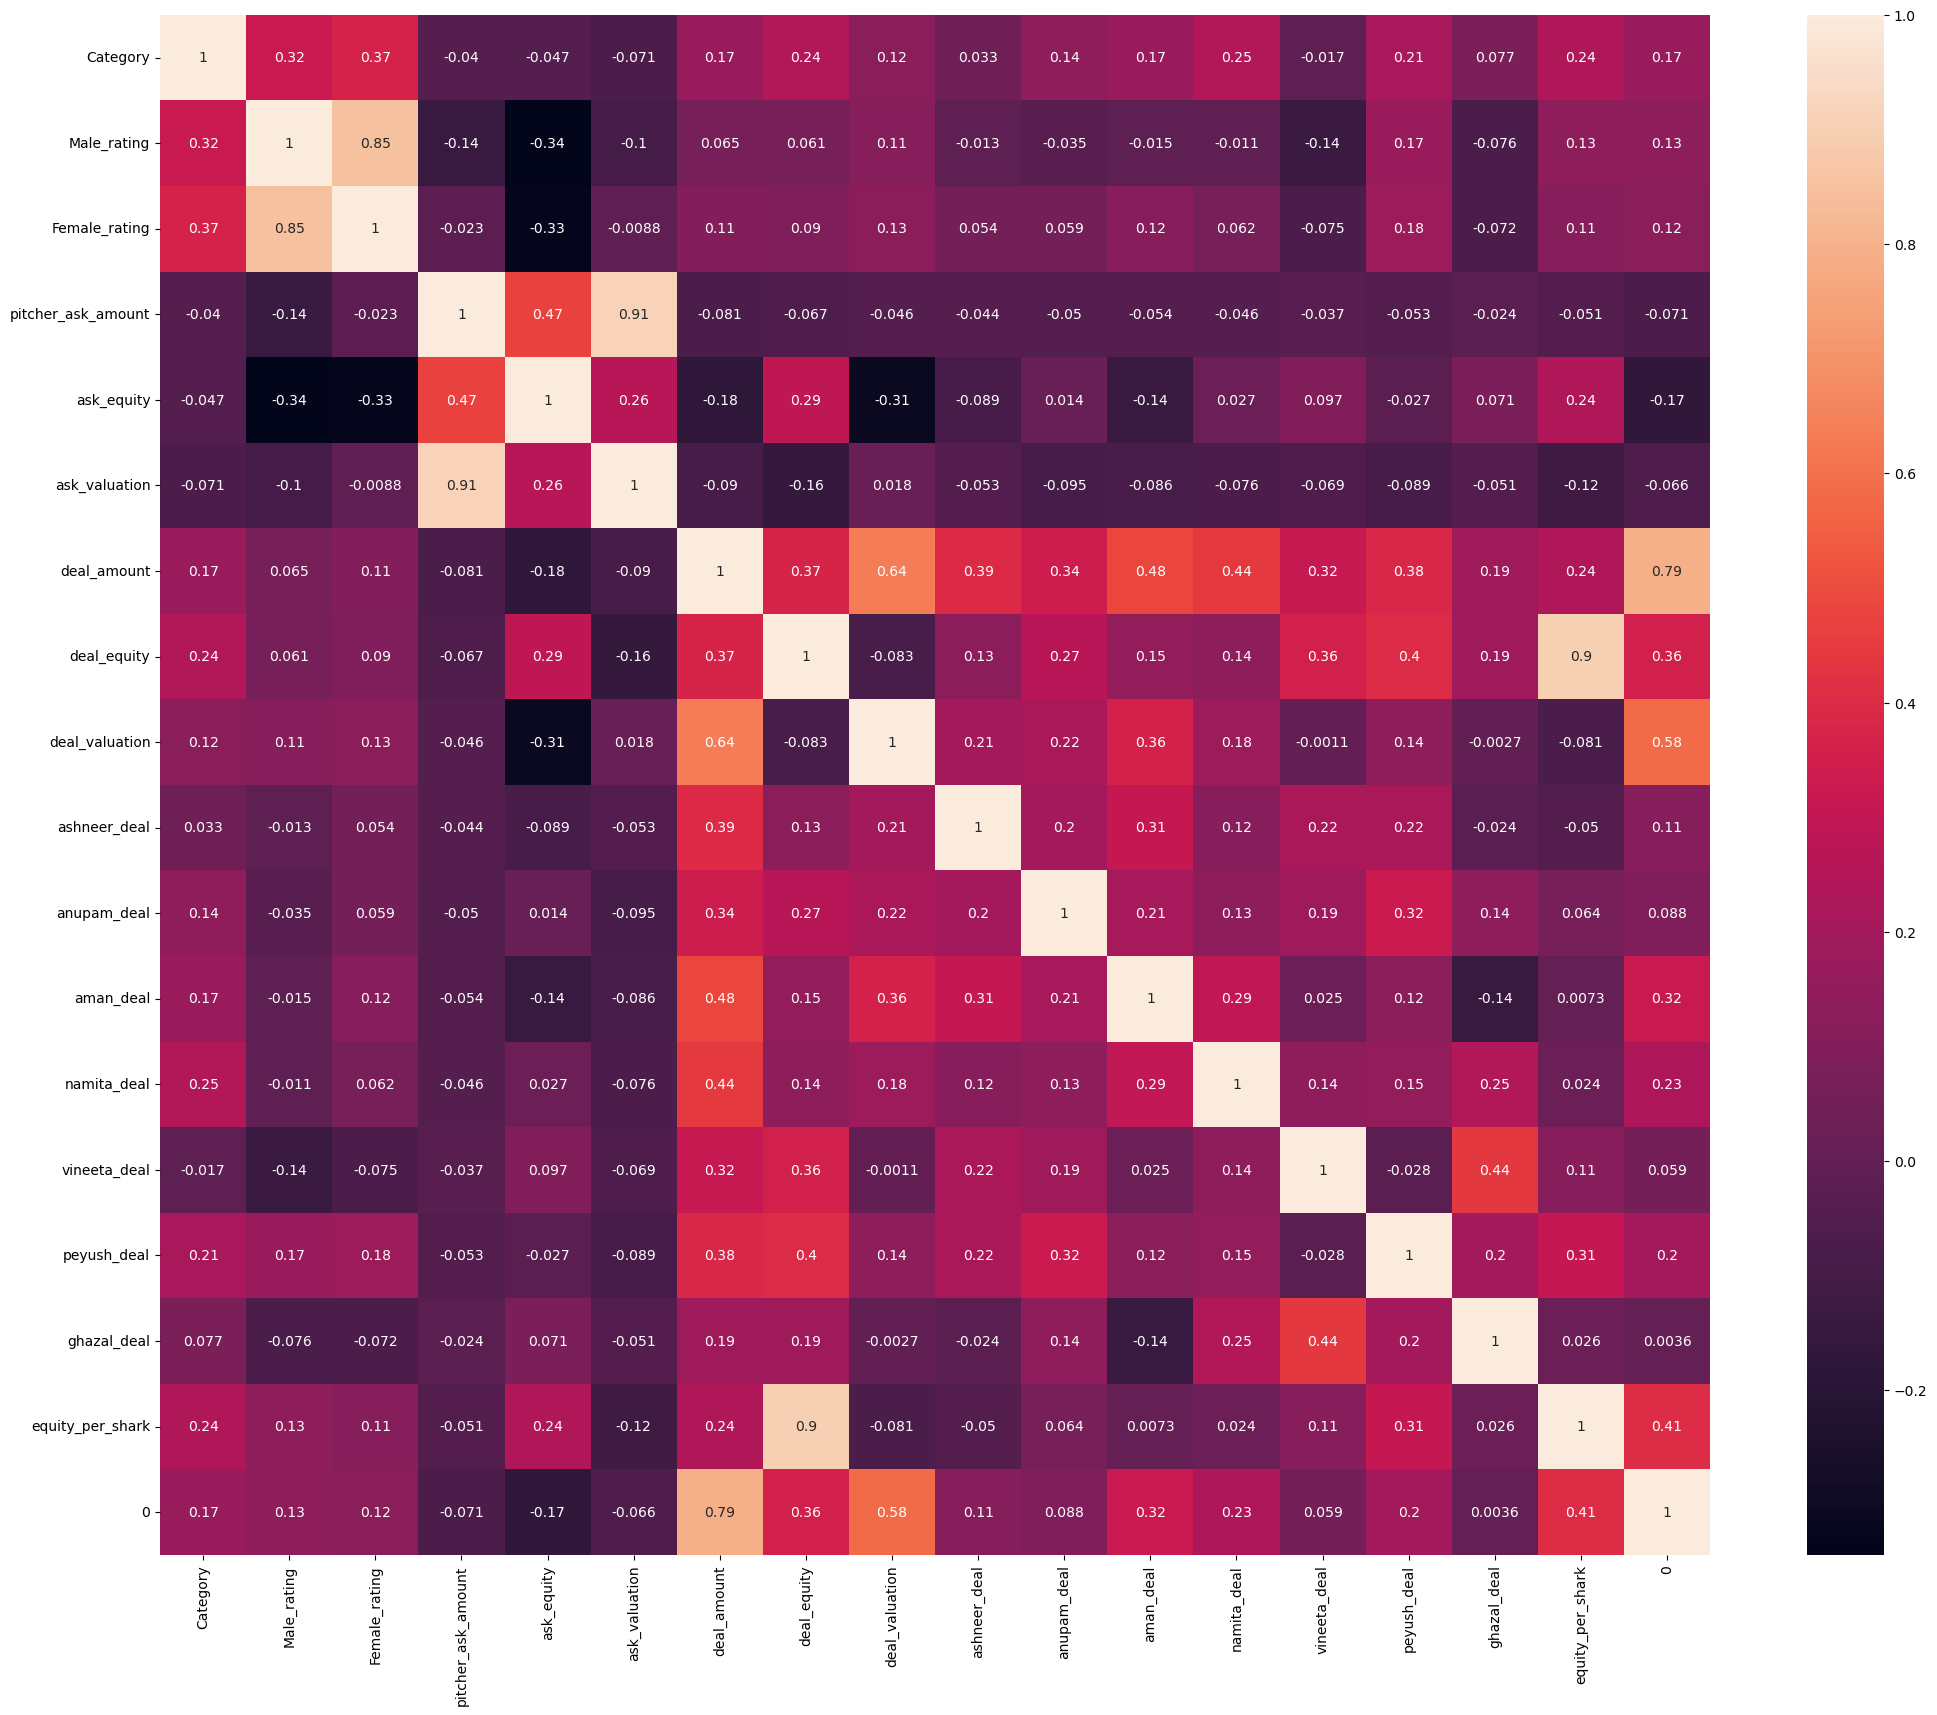

In [121]:
mod = pd.concat([X,y],axis=1)
plt.figure(figsize=(25,20))
sns.heatmap(mod.corr(), annot = True)

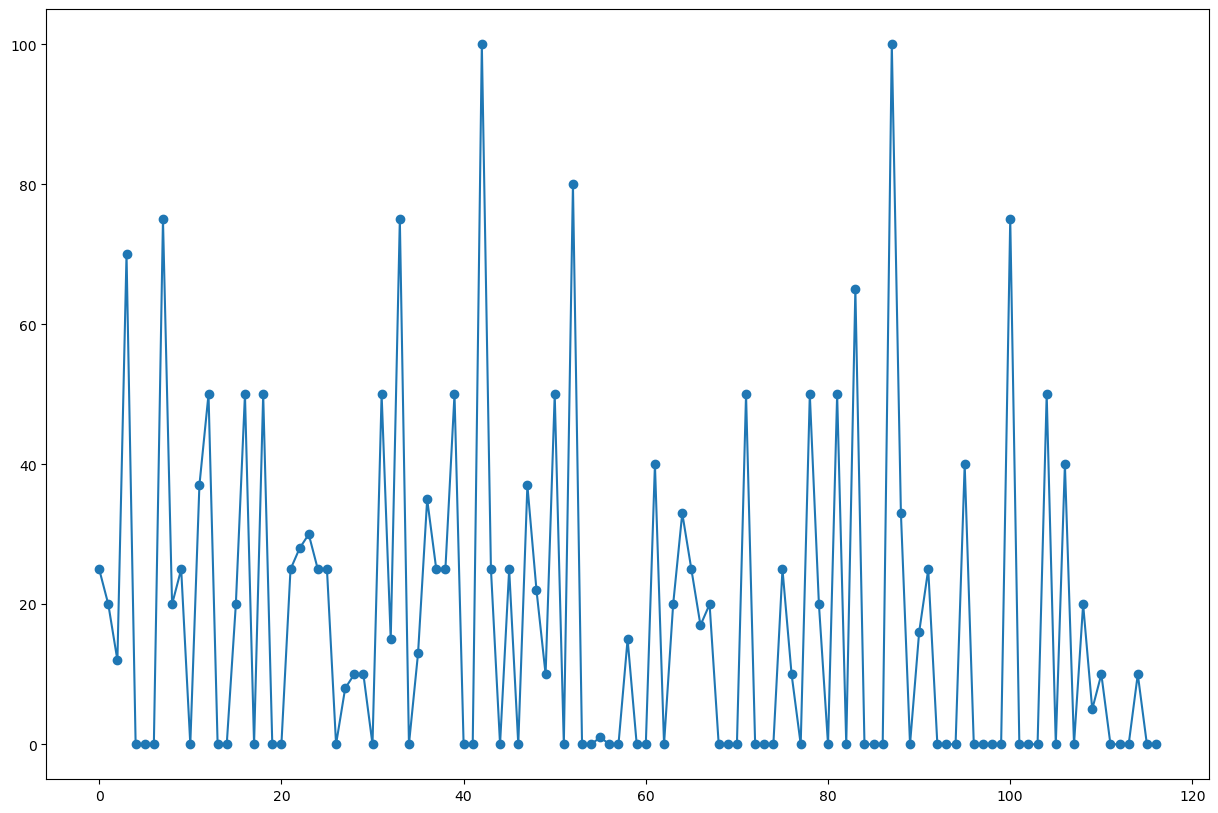

In [122]:
a = []
for i in range(0,117,1):
    a.append(i)
Y = np.array(y)
plt.figure(figsize=(15,10))
plt.plot(a,Y)
plt.scatter(a,Y)

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,shuffle=False)
x_test

,Category,Male_rating,Female_rating,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,equity_per_shark
87,2,3.593750,3.250000,100.0,1.0,10000.00,100.0,4.00,2500.00,0,0,0,0,0,1,0,4.000000
88,4,3.435015,3.387804,75.0,4.0,1875.00,100.0,15.00,666.67,0,0,0,0,1,1,1,5.000000
89,4,3.093750,3.406250,90.0,5.0,1800.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0.000000
90,5,3.500000,3.343750,50.0,5.0,1000.00,50.0,30.00,166.67,0,0,0,0,1,1,1,10.000000
91,4,2.750000,3.000000,75.0,5.0,1500.00,75.0,21.00,357.14,0,0,0,1,1,0,1,7.000000
92,1,3.435015,3.387804,75.0,3.0,2500.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0.000000
93,2,3.593750,3.156250,100.0,3.5,2857.14,0.0,0.00,0.00,0,0,0,0,0,0,0,0.000000
94,0,1.000000,1.000000,75.0,15.0,500.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0.000000
95,2,3.218750,3.000000,80.0,1.0,8000.00,80.0,6.00,1333.33,0,0,0,1,1,0,0,3.000000
96,1,3.125000,3.156250,300.0,1.0,30000.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0.000000


In [124]:
x_train

,Category,Male_rating,Female_rating,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,equity_per_shark
0,4,2.93750,2.937500,50.00000,5.0,1000.00,75.00000,16.00,468.75,1,0,1,0,1,0,0,5.333333
1,2,3.71875,3.437500,40.00000,15.0,266.67,40.00000,50.00,80.00,1,0,0,0,1,0,0,25.000000
2,8,3.03125,2.937500,25.00000,10.0,250.00,25.00000,30.00,83.33,0,1,0,0,1,0,0,15.000000
3,4,3.40625,3.312500,70.00000,1.0,7000.00,70.00000,2.75,2545.45,1,0,0,0,0,0,0,2.750000
4,3,3.65625,3.343750,50.00000,5.0,1000.00,0.00000,0.00,0.00,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,7,3.75000,3.032258,50.00000,10.0,500.00,0.00000,0.00,0.00,0,0,0,0,0,0,0,0.000000
83,1,3.34375,3.500000,65.00000,1.0,6500.00,65.00000,3.00,2166.67,0,0,0,1,0,0,0,3.000000
84,4,3.21875,3.500000,50.00000,10.0,500.00,0.00000,0.00,0.00,0,0,0,0,0,0,0,0.000000
85,9,3.84375,3.625000,0.00101,10.0,0.01,0.00101,4.00,0.03,0,1,0,1,0,1,1,1.000000


In [125]:
#x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, test_size = 0.5,shuffle=False)

In [126]:
x_train

,Category,Male_rating,Female_rating,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,equity_per_shark
0,4,2.93750,2.937500,50.00000,5.0,1000.00,75.00000,16.00,468.75,1,0,1,0,1,0,0,5.333333
1,2,3.71875,3.437500,40.00000,15.0,266.67,40.00000,50.00,80.00,1,0,0,0,1,0,0,25.000000
2,8,3.03125,2.937500,25.00000,10.0,250.00,25.00000,30.00,83.33,0,1,0,0,1,0,0,15.000000
3,4,3.40625,3.312500,70.00000,1.0,7000.00,70.00000,2.75,2545.45,1,0,0,0,0,0,0,2.750000
4,3,3.65625,3.343750,50.00000,5.0,1000.00,0.00000,0.00,0.00,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,7,3.75000,3.032258,50.00000,10.0,500.00,0.00000,0.00,0.00,0,0,0,0,0,0,0,0.000000
83,1,3.34375,3.500000,65.00000,1.0,6500.00,65.00000,3.00,2166.67,0,0,0,1,0,0,0,3.000000
84,4,3.21875,3.500000,50.00000,10.0,500.00,0.00000,0.00,0.00,0,0,0,0,0,0,0,0.000000
85,9,3.84375,3.625000,0.00101,10.0,0.01,0.00101,4.00,0.03,0,1,0,1,0,1,1,1.000000


In [127]:
#x_val

In [128]:
print(x_test.shape)
#print(x_val.shape)
print(x_train.shape)

(30, 17)
(87, 17)


In [129]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [130]:
model = Sequential()
model.add(Dense(17, input_dim=17,kernel_initializer = 'random_uniform', activation = 'softsign'))
model.add(Dense(13,kernel_initializer = 'random_uniform', activation = 'linear'))
model.add(Dense(8,kernel_initializer = 'random_uniform', activation = 'softsign'))
model.add(Dense(1,kernel_initializer = 'random_uniform', activation = 'linear'))

In [131]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy','MSE'])

In [132]:
history = model.fit(x_train, y_train, epochs=150, verbose=1,validation_split=0.2)

Epoch 1/150
3/3 [==============================] - 1s 120ms/step - loss: 947.6619 - accuracy: 0.3188 - MSE: 947.6619 - val_loss: 685.2922 - val_accuracy: 0.0000e+00 - val_MSE: 685.2922
Epoch 2/150
3/3 [==============================] - 0s 29ms/step - loss: 907.0593 - accuracy: 0.0145 - MSE: 907.0593 - val_loss: 643.6783 - val_accuracy: 0.0000e+00 - val_MSE: 643.6783
Epoch 3/150
3/3 [==============================] - 0s 23ms/step - loss: 848.2794 - accuracy: 0.0145 - MSE: 848.2794 - val_loss: 604.9053 - val_accuracy: 0.0000e+00 - val_MSE: 604.9053
Epoch 4/150
3/3 [==============================] - 0s 23ms/step - loss: 791.4634 - accuracy: 0.0145 - MSE: 791.4634 - val_loss: 573.6020 - val_accuracy: 0.0000e+00 - val_MSE: 573.6020
Epoch 5/150
3/3 [==============================] - 0s 24ms/step - loss: 740.4987 - accuracy: 0.0145 - MSE: 740.4987 - val_loss: 543.1976 - val_accuracy: 0.0000e+00 - val_MSE: 543.1976
Epoch 6/150
3/3 [==============================] - 0s 22ms/step - loss: 689.816

Epoch 46/150
3/3 [==============================] - 0s 16ms/step - loss: 145.5978 - accuracy: 0.3478 - MSE: 145.5978 - val_loss: 111.4505 - val_accuracy: 0.2222 - val_MSE: 111.4505
Epoch 47/150
3/3 [==============================] - 0s 23ms/step - loss: 139.2517 - accuracy: 0.1884 - MSE: 139.2517 - val_loss: 112.3598 - val_accuracy: 0.2222 - val_MSE: 112.3598
Epoch 48/150
3/3 [==============================] - 0s 25ms/step - loss: 134.2227 - accuracy: 0.2609 - MSE: 134.2227 - val_loss: 127.7837 - val_accuracy: 0.6111 - val_MSE: 127.7837
Epoch 49/150
3/3 [==============================] - 0s 17ms/step - loss: 127.0469 - accuracy: 0.3478 - MSE: 127.0469 - val_loss: 109.5535 - val_accuracy: 0.6111 - val_MSE: 109.5535
Epoch 50/150
3/3 [==============================] - 0s 34ms/step - loss: 119.2339 - accuracy: 0.3333 - MSE: 119.2339 - val_loss: 106.4293 - val_accuracy: 0.6111 - val_MSE: 106.4293
Epoch 51/150
3/3 [==============================] - 0s 21ms/step - loss: 113.4530 - accuracy: 0

Epoch 92/150
3/3 [==============================] - 0s 25ms/step - loss: 54.8104 - accuracy: 0.3043 - MSE: 54.8104 - val_loss: 143.8003 - val_accuracy: 0.6111 - val_MSE: 143.8003
Epoch 93/150
3/3 [==============================] - 0s 28ms/step - loss: 55.9740 - accuracy: 0.2899 - MSE: 55.9740 - val_loss: 139.6196 - val_accuracy: 0.5556 - val_MSE: 139.6196
Epoch 94/150
3/3 [==============================] - 0s 23ms/step - loss: 55.9745 - accuracy: 0.2754 - MSE: 55.9745 - val_loss: 141.0468 - val_accuracy: 0.2222 - val_MSE: 141.0468
Epoch 95/150
3/3 [==============================] - 0s 23ms/step - loss: 54.1910 - accuracy: 0.2754 - MSE: 54.1910 - val_loss: 146.8500 - val_accuracy: 0.0556 - val_MSE: 146.8500
Epoch 96/150
3/3 [==============================] - 0s 23ms/step - loss: 82.5235 - accuracy: 0.2029 - MSE: 82.5235 - val_loss: 175.8783 - val_accuracy: 0.6111 - val_MSE: 175.8783
Epoch 97/150
3/3 [==============================] - 0s 21ms/step - loss: 64.7032 - accuracy: 0.3623 - MSE

3/3 [==============================] - 0s 25ms/step - loss: 75.2051 - accuracy: 0.3333 - MSE: 75.2051 - val_loss: 187.5835 - val_accuracy: 0.5000 - val_MSE: 187.5835
Epoch 138/150
3/3 [==============================] - 0s 23ms/step - loss: 79.9579 - accuracy: 0.3333 - MSE: 79.9579 - val_loss: 182.5306 - val_accuracy: 0.5556 - val_MSE: 182.5306
Epoch 139/150
3/3 [==============================] - 0s 22ms/step - loss: 75.8769 - accuracy: 0.3478 - MSE: 75.8769 - val_loss: 191.8138 - val_accuracy: 0.5556 - val_MSE: 191.8138
Epoch 140/150
3/3 [==============================] - 0s 24ms/step - loss: 74.4381 - accuracy: 0.3478 - MSE: 74.4381 - val_loss: 214.7634 - val_accuracy: 0.5556 - val_MSE: 214.7634
Epoch 141/150
3/3 [==============================] - 0s 23ms/step - loss: 72.0403 - accuracy: 0.3333 - MSE: 72.0403 - val_loss: 184.4919 - val_accuracy: 0.5556 - val_MSE: 184.4919
Epoch 142/150
3/3 [==============================] - 0s 23ms/step - loss: 74.1083 - accuracy: 0.3333 - MSE: 74.108

In [133]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(x_train, y_train)
dt = tree.DecisionTreeRegressor() 
dt.fit(x_train, y_train)
lr = LinearRegression()
lr.fit(x_train, y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19176\3434078801.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


LinearRegression()

In [134]:
y_pred_rf = rf.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_lr = lr.predict(x_test)
y_pred_ann = model.predict(x_test)

1/1 [==============================] - 0s 91ms/step


In [135]:
def rect(y_pred):
    for i in range(len(y_pred)):
        if y_pred[i]<0:
            y_pred[i] = 0
    return y_pred

In [136]:
y_pred_rf = rect(y_pred_rf)
y_pred_dt = rect(y_pred_dt)
y_pred_lr = rect(y_pred_lr)
y_pred_ann = rect(y_pred_ann)

In [137]:
y_pred_rf = np.array(y_pred_rf)
y_pred_dt = np.array(y_pred_dt)
y_pred_lr = np.array(y_pred_lr)
y_pred_ann = np.array(y_pred_ann)
y_test = np.array(y_test)
diff = []
print("Original test values \t | Random Forest \t | Decision Tree \t | Linear Regression \t | ANN ")
print("----------------------------------------------------------------------------------------------------")
for j in range(len(y_test)):
    print(y_test[j],'\t\t\t | ',y_pred_rf[j],'\t\t | ',y_pred_dt[j],'\t\t | ',y_pred_lr[j],'\t\t | ',y_pred_ann[j])

Original test values 	 | Random Forest 	 | Decision Tree 	 | Linear Regression 	 | ANN 
----------------------------------------------------------------------------------------------------
[100] 			 |  56.55 		 |  50.0 		 |  [55.28697393] 		 |  [48.93596]
[33] 			 |  41.78 		 |  37.0 		 |  [38.33003609] 		 |  [62.917458]
[0] 			 |  0.0 		 |  0.0 		 |  [3.77185802] 		 |  [0.]
[16] 			 |  27.36 		 |  25.0 		 |  [5.32643535] 		 |  [25.44909]
[25] 			 |  43.185 		 |  37.0 		 |  [26.57879415] 		 |  [62.745697]
[0] 			 |  0.0 		 |  0.0 		 |  [2.8170103] 		 |  [0.]
[0] 			 |  0.0 		 |  0.0 		 |  [2.93359873] 		 |  [0.]
[0] 			 |  0.0 		 |  0.0 		 |  [0.] 		 |  [0.]
[40] 			 |  51.955 		 |  75.0 		 |  [33.14616901] 		 |  [62.808212]
[0] 			 |  0.0 		 |  0.0 		 |  [0.] 		 |  [0.]
[0] 			 |  0.0 		 |  0.0 		 |  [5.21922407] 		 |  [0.]
[0] 			 |  0.0 		 |  0.0 		 |  [4.19106103] 		 |  [0.]
[0] 			 |  0.0 		 |  0.0 		 |  [3.98605446] 		 |  [0.]
[75] 			 |  55.735 		 |  70.0 		 |  [50.91174606] 		 

In [138]:
def convert(y):
    y_1 = []
    print(y.shape)
    for i in range(len(y)):
        y_1.append(y[i][0])
    return y_1
y_test = convert(y_test)
y_pred_lr = convert(y_pred_lr)
y_pred_ann = convert(y_pred_ann)

(30, 1)
(30, 1)
(30, 1)


In [139]:
result = pd.DataFrame({'Expected': y_test, 'Prediction - Linear Regression': y_pred_lr, 
                       'Prediction - Random Forest': y_pred_rf, 'Prediction - Decision Tree': y_pred_dt, 
                       'Prediction - Our Model (ANN)': y_pred_ann})
result

,Expected,Prediction - Linear Regression,Prediction - Random Forest,Prediction - Decision Tree,Prediction - Our Model (ANN)
0,100,55.286974,56.550,50.0,48.935959
1,33,38.330036,41.780,37.0,62.917458
2,0,3.771858,0.000,0.0,0.000000
3,16,5.326435,27.360,25.0,25.449089
4,25,26.578794,43.185,37.0,62.745697
5,0,2.817010,0.000,0.0,0.000000
6,0,2.933599,0.000,0.0,0.000000
7,0,0.000000,0.000,0.0,0.000000
8,40,33.146169,51.955,75.0,62.808212
9,0,0.000000,0.000,0.0,0.000000


In [140]:
result.to_excel("Results_P2_75-25.xlsx")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


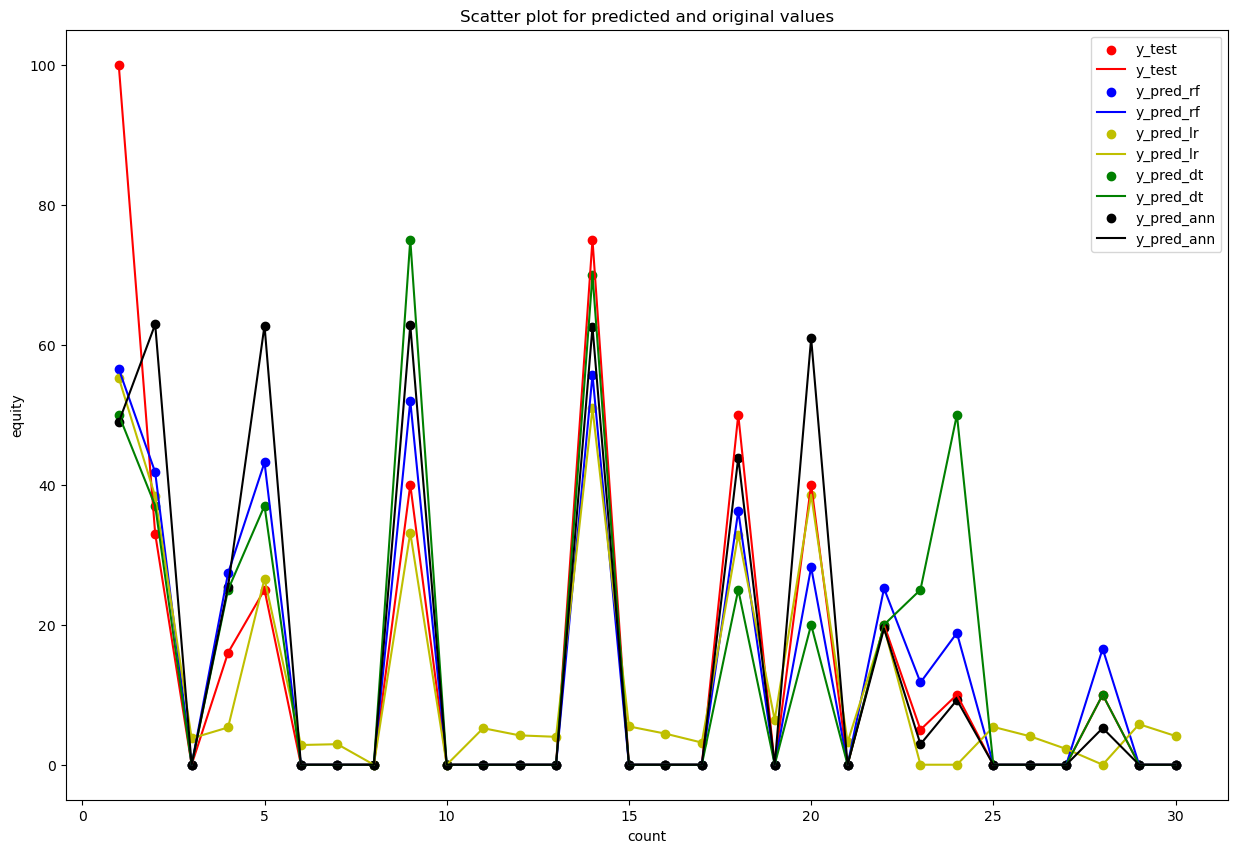

In [141]:
b = []
for j in range(1,len(y_pred_rf)+1):
    b.append(j)
plt.figure(figsize=(15, 10))
plt.scatter(b,y_test,color='r')
plt.plot(b,y_test,color='r')
plt.scatter(b,y_pred_rf,color='b')
plt.plot(b,y_pred_rf,color='b')
plt.scatter(b,y_pred_lr,color='y')
plt.plot(b,y_pred_lr,color='y')
plt.scatter(b,y_pred_dt,color='g')
plt.plot(b,y_pred_dt,color='g')
plt.scatter(b,y_pred_ann,color='black')
plt.plot(b,y_pred_ann,color='black')
plt.legend()
plt.xlabel("count")
plt.ylabel("equity")
plt.title("Scatter plot for predicted and original values")
plt.legend(["y_test","y_test","y_pred_rf","y_pred_rf","y_pred_lr","y_pred_lr","y_pred_dt","y_pred_dt","y_pred_ann","y_pred_ann"],loc="best")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


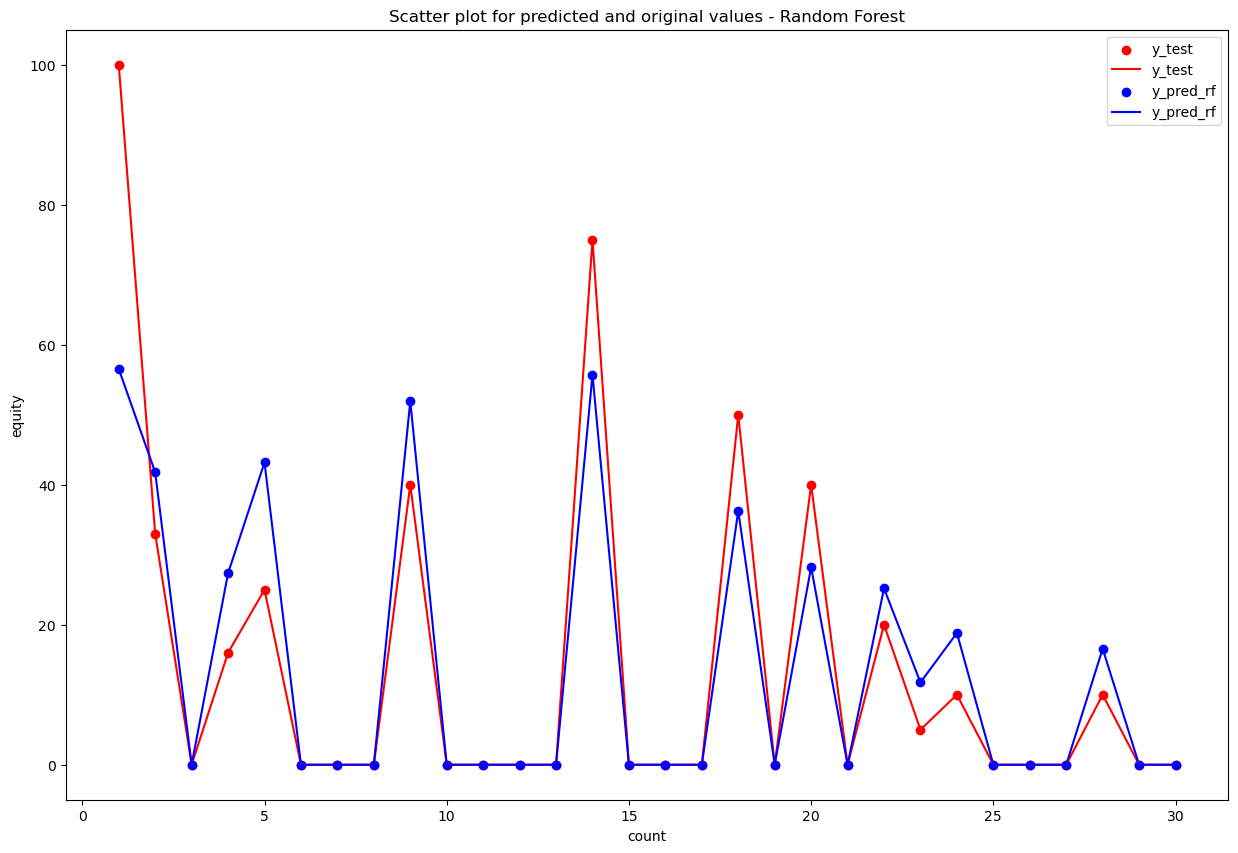

In [142]:
plt.figure(figsize=(15, 10))
plt.scatter(b,y_test,color='r')
plt.plot(b,y_test,color='r')
plt.scatter(b,y_pred_rf,color='b')
plt.plot(b,y_pred_rf,color='b')
plt.legend()
plt.xlabel("count")
plt.ylabel("equity")
plt.title("Scatter plot for predicted and original values - Random Forest")
plt.legend(["y_test","y_test","y_pred_rf","y_pred_rf","y_pred_lr","y_pred_lr","y_pred_dt","y_pred_dt","y_pred_ann","y_pred_ann"],loc="best")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


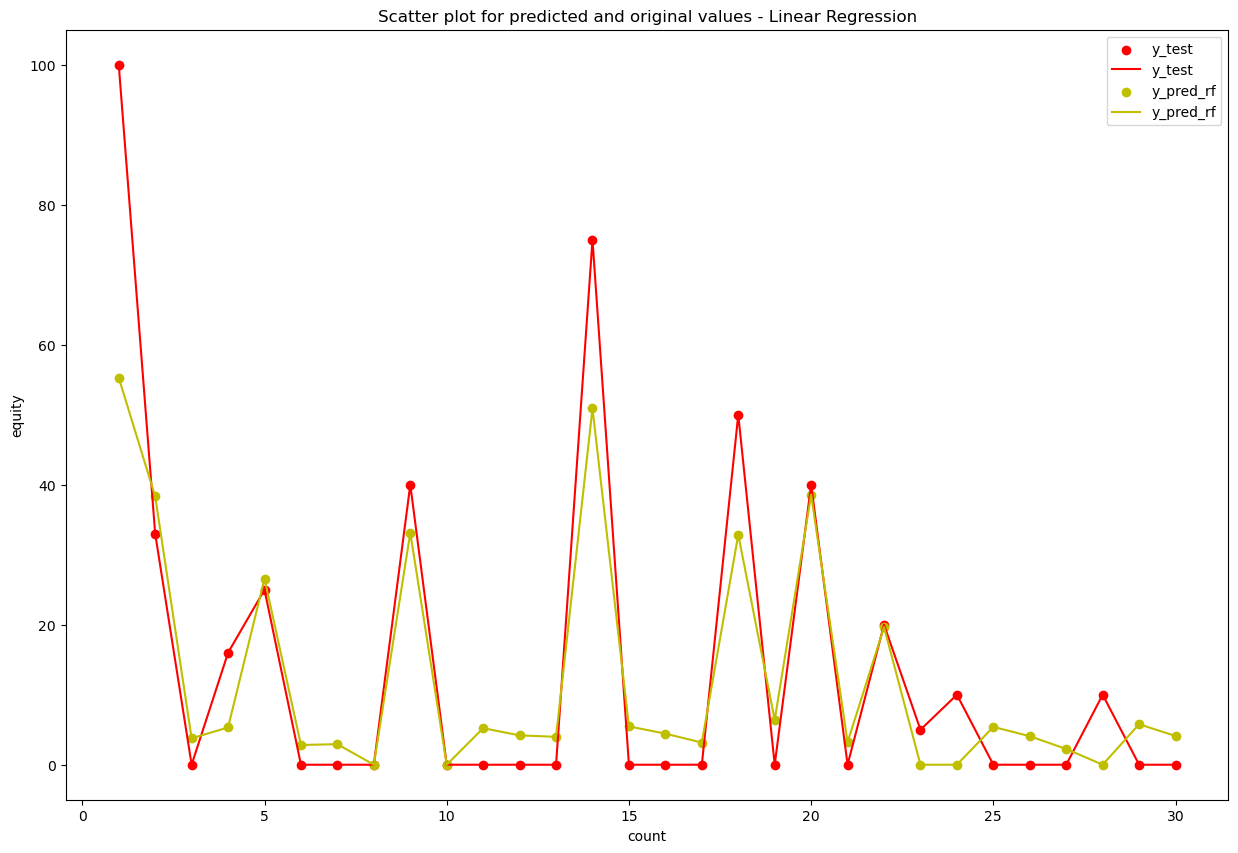

In [143]:
plt.figure(figsize=(15, 10))
plt.scatter(b,y_test,color='r')
plt.plot(b,y_test,color='r')
plt.scatter(b,y_pred_lr,color='y')
plt.plot(b,y_pred_lr,color='y')
plt.legend()
plt.xlabel("count")
plt.ylabel("equity")
plt.title("Scatter plot for predicted and original values - Linear Regression")
plt.legend(["y_test","y_test","y_pred_rf","y_pred_rf","y_pred_lr","y_pred_lr","y_pred_dt","y_pred_dt","y_pred_ann","y_pred_ann"],loc="best")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


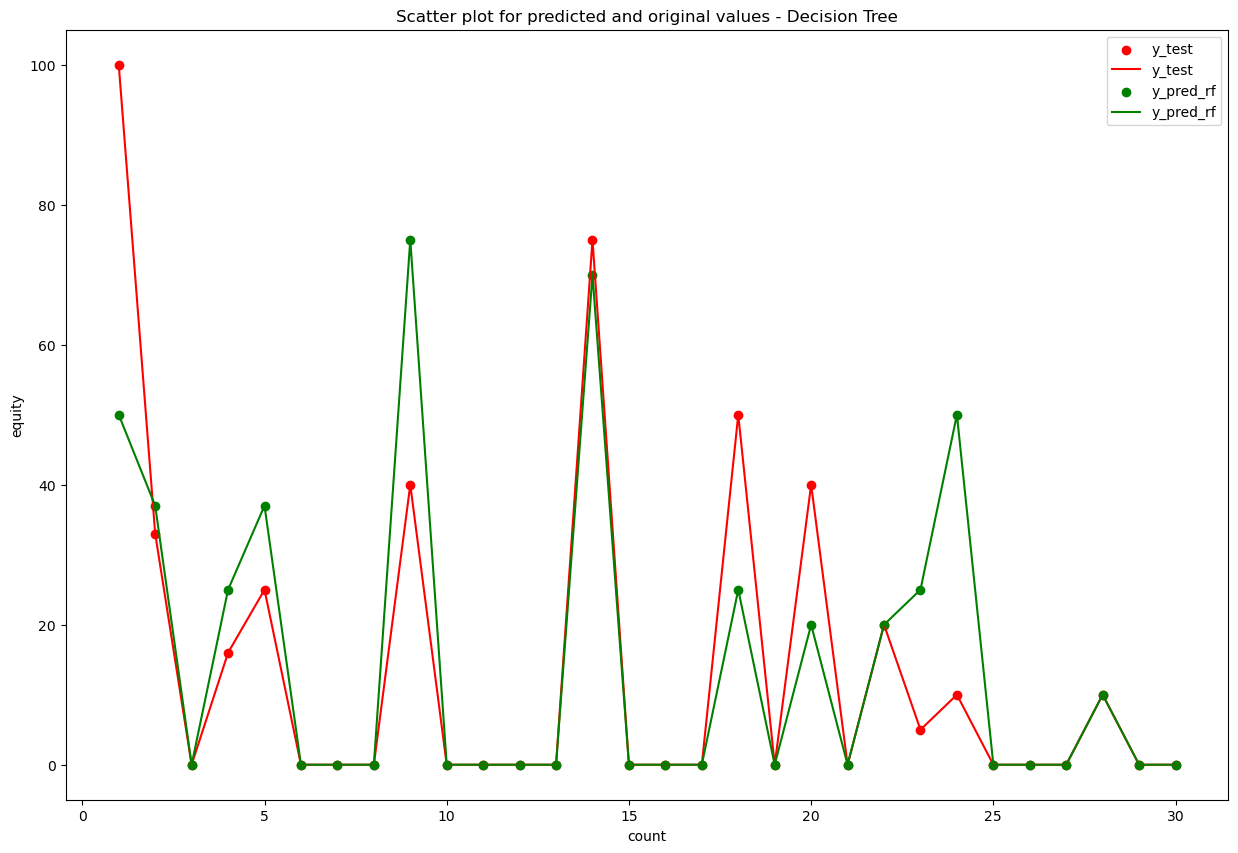

In [144]:
plt.figure(figsize=(15, 10))
plt.scatter(b,y_test,color='r')
plt.plot(b,y_test,color='r')
plt.scatter(b,y_pred_dt,color='g')
plt.plot(b,y_pred_dt,color='g')
plt.legend()
plt.xlabel("count")
plt.ylabel("equity")
plt.title("Scatter plot for predicted and original values - Decision Tree")
plt.legend(["y_test","y_test","y_pred_rf","y_pred_rf","y_pred_lr","y_pred_lr","y_pred_dt","y_pred_dt","y_pred_ann","y_pred_ann"],loc="best")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


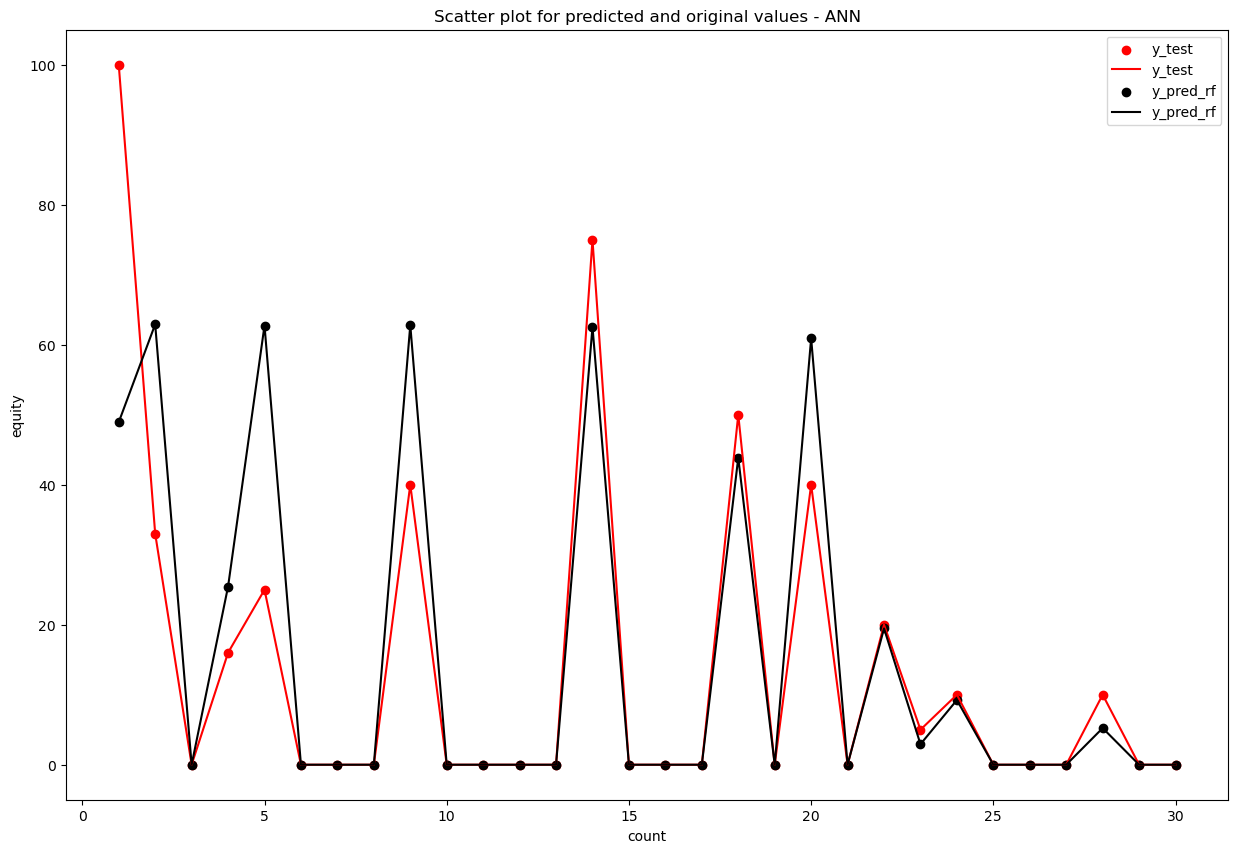

In [145]:
plt.figure(figsize=(15, 10))
plt.scatter(b,y_test,color='r')
plt.plot(b,y_test,color='r')
plt.scatter(b,y_pred_ann,color='black')
plt.plot(b,y_pred_ann,color='black')
plt.legend()
plt.xlabel("count")
plt.ylabel("equity")
plt.title("Scatter plot for predicted and original values - ANN")
plt.legend(["y_test","y_test","y_pred_rf","y_pred_rf","y_pred_lr","y_pred_lr","y_pred_dt","y_pred_dt","y_pred_ann","y_pred_ann"],loc="best")
plt.show()

In [146]:
def score(y_test,y_pred):
    print('MAE :',metrics.mean_absolute_error(y_test,y_pred))
    print('MSE :',metrics.mean_squared_error(y_test,y_pred))
    print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('R2 :',metrics.r2_score(y_test, y_pred))
    print('R :',np.sqrt(metrics.r2_score(y_test,y_pred)))

In [147]:
print("Random Forest")
score(y_test, y_pred_rf)

Random Forest
MAE : 5.528666666666666
MSE : 115.33537166666669
RMSE : 10.739430695649872
R2 : 0.8069966485318618
R : 0.8983299218727281


In [148]:
print("Decision Tree")
score(y_test, y_pred_dt)

Decision Tree
MAE : 7.333333333333333
MSE : 233.86666666666667
RMSE : 15.292699783447874
R2 : 0.6086452073540789
R : 0.7801571683667842


In [149]:
print("Linear Regression")
score(y_test, y_pred_lr)

Linear Regression
MAE : 6.8123558101332655
MSE : 119.85129739734872
RMSE : 10.947661731956678
R2 : 0.7994396537573374
R : 0.8941138930568843


In [150]:
print("ANN")
score(y_test, y_pred_ann)

ANN
MAE : 6.620440228780111
MSE : 206.4947640331684
RMSE : 14.369925679458763
R2 : 0.6544496198945167
R : 0.8089806053883595


In [151]:
"""x = np.array(x_val)
y = np.array(y_val)
x, y"""

'x = np.array(x_val)\ny = np.array(y_val)\nx, y'

In [152]:
"""# For Random Forest Classifier
# Cross-Validate
kf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification
    
oos_y_rf = []
oos_pred_rf = []

fold = 0
for train, test in kf.split(x):
    fold+=1
    #print(f"Fold #{fold}")
        
    x_train_rf = x[train]
    y_train_rf = y[train]
    x_test_rf = x[test]
    y_test_rf = y[test]
    
    rf = RandomForestRegressor(n_estimators=200)
    rf.fit(x_train_rf, y_train_rf)
    
    pred_rf = rf.predict(x_test_rf)
    for i in range(len(pred_rf)):
        if pred_rf[i]<0:
            pred_rf[i] = 0
    
    oos_y_rf.append(y_test_rf)
    oos_pred_rf.append(pred_rf)    """

'# For Random Forest Classifier\n# Cross-Validate\nkf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification\n    \noos_y_rf = []\noos_pred_rf = []\n\nfold = 0\nfor train, test in kf.split(x):\n    fold+=1\n    #print(f"Fold #{fold}")\n        \n    x_train_rf = x[train]\n    y_train_rf = y[train]\n    x_test_rf = x[test]\n    y_test_rf = y[test]\n    \n    rf = RandomForestRegressor(n_estimators=200)\n    rf.fit(x_train_rf, y_train_rf)\n    \n    pred_rf = rf.predict(x_test_rf)\n    for i in range(len(pred_rf)):\n        if pred_rf[i]<0:\n            pred_rf[i] = 0\n    \n    oos_y_rf.append(y_test_rf)\n    oos_pred_rf.append(pred_rf)    '

In [153]:
"""# Build the oos prediction list and calculate the error.
print('Random Forest')
oos_y_rf = np.concatenate(oos_y_rf)
oos_pred_rf = np.concatenate(oos_pred_rf)
rmse_score_rf = np.sqrt(metrics.mean_squared_error(oos_y_rf,oos_pred_rf))
mse_score_rf = metrics.mean_squared_error(oos_y_rf,oos_pred_rf)
mae_score_rf = metrics.mean_absolute_error(oos_y_rf,oos_pred_rf)
#acc_score = metrics.r2_score(oos_y,oos_pred)
print(f"Fold score (RMSE) : {rmse_score_rf}")
print(f"Fold score (MSE) : {mse_score_rf}")
print(f"Fold score (MAE) : {mae_score_rf}")"""

'# Build the oos prediction list and calculate the error.\nprint(\'Random Forest\')\noos_y_rf = np.concatenate(oos_y_rf)\noos_pred_rf = np.concatenate(oos_pred_rf)\nrmse_score_rf = np.sqrt(metrics.mean_squared_error(oos_y_rf,oos_pred_rf))\nmse_score_rf = metrics.mean_squared_error(oos_y_rf,oos_pred_rf)\nmae_score_rf = metrics.mean_absolute_error(oos_y_rf,oos_pred_rf)\n#acc_score = metrics.r2_score(oos_y,oos_pred)\nprint(f"Fold score (RMSE) : {rmse_score_rf}")\nprint(f"Fold score (MSE) : {mse_score_rf}")\nprint(f"Fold score (MAE) : {mae_score_rf}")'

In [154]:
"""# For Decision Tree Regressor
# Cross-Validate
kf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification
    
oos_y_dt = []
oos_pred_dt = []

fold = 0
for train, test in kf.split(x):
    fold+=1
    #print(f"Fold #{fold}")
        
    x_train_dt = x[train]
    y_train_dt = y[train]
    x_test_dt = x[test]
    y_test_dt = y[test]
    
    dt = tree.DecisionTreeRegressor() 
    dt.fit(x_train_dt, y_train_dt)
    
    pred_dt = dt.predict(x_test_dt)
    for i in range(len(pred_dt)):
        if pred_dt[i]<0:
            pred_dt[i] = 0
    
    oos_y_dt.append(y_test_dt)
    oos_pred_dt.append(pred_dt)    """

'# For Decision Tree Regressor\n# Cross-Validate\nkf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification\n    \noos_y_dt = []\noos_pred_dt = []\n\nfold = 0\nfor train, test in kf.split(x):\n    fold+=1\n    #print(f"Fold #{fold}")\n        \n    x_train_dt = x[train]\n    y_train_dt = y[train]\n    x_test_dt = x[test]\n    y_test_dt = y[test]\n    \n    dt = tree.DecisionTreeRegressor() \n    dt.fit(x_train_dt, y_train_dt)\n    \n    pred_dt = dt.predict(x_test_dt)\n    for i in range(len(pred_dt)):\n        if pred_dt[i]<0:\n            pred_dt[i] = 0\n    \n    oos_y_dt.append(y_test_dt)\n    oos_pred_dt.append(pred_dt)    '

In [155]:
"""# Build the oos prediction list and calculate the error.
print('Decision Tree')
oos_y_dt = np.concatenate(oos_y_dt)
oos_pred_dt = np.concatenate(oos_pred_dt)
rmse_score_dt = np.sqrt(metrics.mean_squared_error(oos_y_dt,oos_pred_dt))
mse_score_dt = metrics.mean_squared_error(oos_y_dt,oos_pred_dt)
mae_score_dt = metrics.mean_absolute_error(oos_y_dt,oos_pred_dt)
#acc_score = metrics.r2_score(oos_y,oos_pred)
print(f"Fold score (RMSE) : {rmse_score_dt}")
print(f"Fold score (MSE) : {mse_score_dt}")
print(f"Fold score (MAE) : {mae_score_dt}")"""

'# Build the oos prediction list and calculate the error.\nprint(\'Decision Tree\')\noos_y_dt = np.concatenate(oos_y_dt)\noos_pred_dt = np.concatenate(oos_pred_dt)\nrmse_score_dt = np.sqrt(metrics.mean_squared_error(oos_y_dt,oos_pred_dt))\nmse_score_dt = metrics.mean_squared_error(oos_y_dt,oos_pred_dt)\nmae_score_dt = metrics.mean_absolute_error(oos_y_dt,oos_pred_dt)\n#acc_score = metrics.r2_score(oos_y,oos_pred)\nprint(f"Fold score (RMSE) : {rmse_score_dt}")\nprint(f"Fold score (MSE) : {mse_score_dt}")\nprint(f"Fold score (MAE) : {mae_score_dt}")'

In [156]:
"""# For Linear Regression
# Cross-Validate
kf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification
    
oos_y_lr = []
oos_pred_lr = []

fold = 0
for train, test in kf.split(x):
    fold+=1
    #print(f"Fold #{fold}")
        
    x_train_lr = x[train]
    y_train_lr = y[train]
    x_test_lr = x[test]
    y_test_lr = y[test]
    
    lr = LinearRegression() 
    lr.fit(x_train_lr, y_train_lr)
    
    pred_lr = lr.predict(x_test_lr)
    for i in range(len(pred_lr)):
        if pred_lr[i]<0:
            pred_lr[i] = 0
    
    oos_y_lr.append(y_test_lr)
    oos_pred_lr.append(pred_lr)    """

'# For Linear Regression\n# Cross-Validate\nkf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification\n    \noos_y_lr = []\noos_pred_lr = []\n\nfold = 0\nfor train, test in kf.split(x):\n    fold+=1\n    #print(f"Fold #{fold}")\n        \n    x_train_lr = x[train]\n    y_train_lr = y[train]\n    x_test_lr = x[test]\n    y_test_lr = y[test]\n    \n    lr = LinearRegression() \n    lr.fit(x_train_lr, y_train_lr)\n    \n    pred_lr = lr.predict(x_test_lr)\n    for i in range(len(pred_lr)):\n        if pred_lr[i]<0:\n            pred_lr[i] = 0\n    \n    oos_y_lr.append(y_test_lr)\n    oos_pred_lr.append(pred_lr)    '

In [157]:
"""# Build the oos prediction list and calculate the error.
print('Linear Regression')
oos_y_lr = np.concatenate(oos_y_lr)
oos_pred_lr = np.concatenate(oos_pred_lr)
rmse_score_lr = np.sqrt(metrics.mean_squared_error(oos_y_lr,oos_pred_lr))
mse_score_lr = metrics.mean_squared_error(oos_y_lr,oos_pred_lr)
mae_score_lr = metrics.mean_absolute_error(oos_y_lr,oos_pred_lr)
#acc_score = metrics.r2_score(oos_y,oos_pred)
print(f"Fold score (RMSE) : {rmse_score_lr}")
print(f"Fold score (MSE) : {mse_score_lr}")
print(f"Fold score (MAE) : {mae_score_lr}")"""

'# Build the oos prediction list and calculate the error.\nprint(\'Linear Regression\')\noos_y_lr = np.concatenate(oos_y_lr)\noos_pred_lr = np.concatenate(oos_pred_lr)\nrmse_score_lr = np.sqrt(metrics.mean_squared_error(oos_y_lr,oos_pred_lr))\nmse_score_lr = metrics.mean_squared_error(oos_y_lr,oos_pred_lr)\nmae_score_lr = metrics.mean_absolute_error(oos_y_lr,oos_pred_lr)\n#acc_score = metrics.r2_score(oos_y,oos_pred)\nprint(f"Fold score (RMSE) : {rmse_score_lr}")\nprint(f"Fold score (MSE) : {mse_score_lr}")\nprint(f"Fold score (MAE) : {mae_score_lr}")'

In [158]:
"""# For ANN
# Cross-Validate
kf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification
    
oos_y_ann = []
oos_pred_ann = []

fold = 0
for train, test in kf.split(x):
    fold+=1
    #print(f"Fold #{fold}")
        
    x_train_ann = x[train]
    y_train_ann = y[train]
    x_test_ann = x[test]
    y_test_ann = y[test]
    
    model = Sequential()
    model.add(Dense(17, input_dim=17,kernel_initializer = 'random_uniform', activation = 'softsign'))
    model.add(Dense(13,kernel_initializer = 'random_uniform', activation = 'linear'))
    model.add(Dense(8,kernel_initializer = 'random_uniform', activation = 'softsign'))
    model.add(Dense(1,kernel_initializer = 'random_uniform', activation = 'linear'))
    model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy','MSE'])
    model.fit(x_train, y_train, epochs=150, verbose=0,validation_split=0.2)
    
    pred_ann = model.predict(x_test_ann)
    for i in range(len(pred_ann)):
        if pred_ann[i]<0:
            pred_ann[i] = 0
    
    oos_y_ann.append(y_test_ann)
    oos_pred_ann.append(pred_ann)    """

'# For ANN\n# Cross-Validate\nkf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification\n    \noos_y_ann = []\noos_pred_ann = []\n\nfold = 0\nfor train, test in kf.split(x):\n    fold+=1\n    #print(f"Fold #{fold}")\n        \n    x_train_ann = x[train]\n    y_train_ann = y[train]\n    x_test_ann = x[test]\n    y_test_ann = y[test]\n    \n    model = Sequential()\n    model.add(Dense(17, input_dim=17,kernel_initializer = \'random_uniform\', activation = \'softsign\'))\n    model.add(Dense(13,kernel_initializer = \'random_uniform\', activation = \'linear\'))\n    model.add(Dense(8,kernel_initializer = \'random_uniform\', activation = \'softsign\'))\n    model.add(Dense(1,kernel_initializer = \'random_uniform\', activation = \'linear\'))\n    model.compile(loss=\'MSE\', optimizer=\'sgd\', metrics=[\'accuracy\',\'MSE\'])\n    model.fit(x_train, y_train, epochs=150, verbose=0,validation_split=0.2)\n    \n    pred_ann = model.predict(x_test_ann)\n    for i in range(len(pred

In [159]:
"""# Build the oos prediction list and calculate the error.
print('ANN')
oos_y_ann = np.concatenate(oos_y_ann)
oos_pred_ann = np.concatenate(oos_pred_ann)
rmse_score_ann = np.sqrt(metrics.mean_squared_error(oos_y_ann,oos_pred_ann))
mse_score_ann = metrics.mean_squared_error(oos_y_ann,oos_pred_ann)
mae_score_ann = metrics.mean_absolute_error(oos_y_ann,oos_pred_ann)
#acc_score = metrics.r2_score(oos_y,oos_pred)
print(f"Fold score (RMSE) : {rmse_score_ann}")
print(f"Fold score (MSE) : {mse_score_ann}")
print(f"Fold score (MAE) : {mae_score_ann}")"""

'# Build the oos prediction list and calculate the error.\nprint(\'ANN\')\noos_y_ann = np.concatenate(oos_y_ann)\noos_pred_ann = np.concatenate(oos_pred_ann)\nrmse_score_ann = np.sqrt(metrics.mean_squared_error(oos_y_ann,oos_pred_ann))\nmse_score_ann = metrics.mean_squared_error(oos_y_ann,oos_pred_ann)\nmae_score_ann = metrics.mean_absolute_error(oos_y_ann,oos_pred_ann)\n#acc_score = metrics.r2_score(oos_y,oos_pred)\nprint(f"Fold score (RMSE) : {rmse_score_ann}")\nprint(f"Fold score (MSE) : {mse_score_ann}")\nprint(f"Fold score (MAE) : {mae_score_ann}")'